**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Agrupamiento DBSCAN

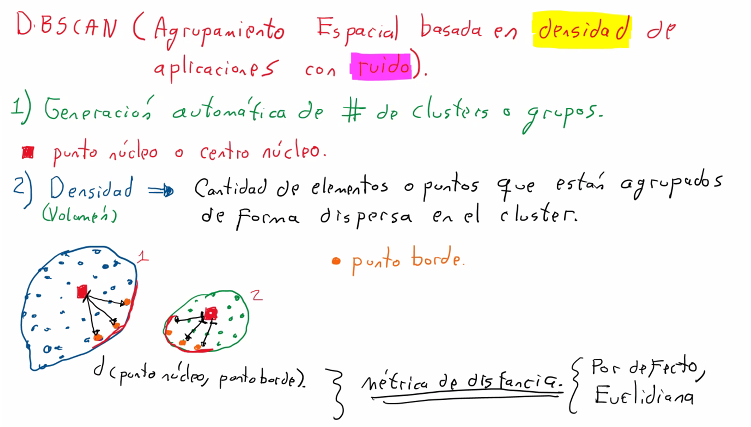

In [1]:
from IPython.display import Image
Image('DBSCAN_1.png')

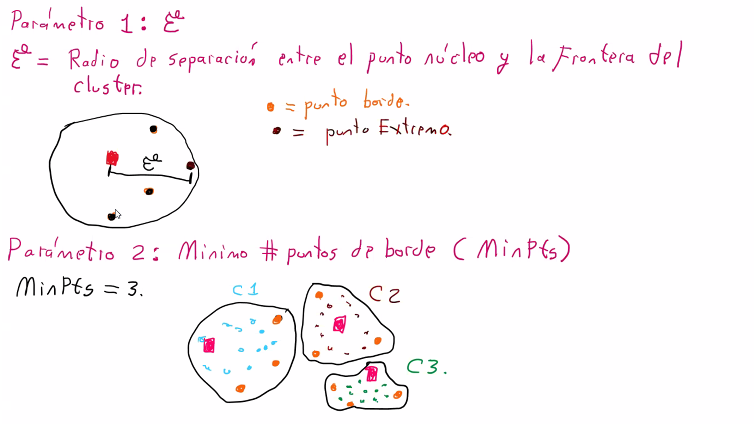

In [2]:
Image('DBSCAN_2.png')

## Lectura de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import io
import requests
import time

In [ ]:
urls = ["https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/9.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/10.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/11.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/12.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/13.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/14.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/15.csv"]

In [ ]:
fuentes = [r'1.csv',
           r'2.csv',
           r'3.csv',
           r'4.csv',
           r'5.csv',
           r'6.csv',
           r'7.csv',
           r'8.csv',
           r'9.csv',
           r'10.csv',
           r'11.csv',
           r'12.csv',
           r'13.csv',
           r'14.csv',
           r'15.csv']

In [ ]:
Inception = zip(urls, fuentes)

In [ ]:
def download_url(args):
    t0 = time.time()
    url, fn = args[0], args[1]
    try:
        r = requests.get(url)
        with open(fn, 'wb') as f:
            f.write(r.content)
        return(url, time.time() - t0)
    except Exception as e:
        print('Exception in download_url():', e)

In [ ]:
t0 = time.time()
for i in Inception:
    result = download_url(i)
    print('url:', result[0], 'time:', result[1])
print('Total time:', time.time() - t0)

url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv time: 0.14927935600280762
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv time: 0.13695716857910156
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv time: 0.11648917198181152
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv time: 0.12461519241333008
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv time: 0.11295723915100098
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv time: 0.13036608695983887
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv time: 0.11789274215698242
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv time: 0.11301827430725098
url: https://raw.githubusercontent.com/javierfernandobot

In [ ]:
data = pd.concat(map(pd.read_csv, ['1.csv','2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv',
                                   '11.csv', '12.csv', '13.csv', '14.csv', '15.csv'], ','), ignore_index = True, sort = False, axis = 1)
display(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  sort=sort,


,0,1,2,3
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [ ]:
data = pd.DataFrame(data.values, columns = ['Time(s)', 'x acceleration', 'y acceleration', 'z acceleration'])
display(data)

,Time(s),x acceleration,y acceleration,z acceleration
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [ ]:
TIME = data['Time(s)']
X = data[['x acceleration','y acceleration', 'z acceleration']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler(feature_range = (0,1))
X_norm = MM.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = ['x acceleration','y acceleration', 'z acceleration'])

## Primera Prueba con el Algoritmo DBSCAN

In [ ]:
!pip install validclust

In [ ]:
from sklearn.cluster import DBSCAN # Algoritmo DBSCAN
import seaborn as sns

In [ ]:
EPS = 0.05
MIN_SAMPLES = 10

Modelo_DBSCAN_1 = DBSCAN(eps = EPS, min_samples = MIN_SAMPLES, metric = 'euclidean', leaf_size = 30)
Modelo_DBSCAN_2 = DBSCAN(eps = EPS, min_samples = MIN_SAMPLES, metric = 'cityblock', leaf_size = 30)
Modelo_DBSCAN_3 = DBSCAN(eps = EPS, min_samples = MIN_SAMPLES, metric = 'l2', leaf_size = 30)

Modelo_DBSCAN_1.fit(X_norm)
Modelo_DBSCAN_2.fit(X_norm)
Modelo_DBSCAN_3.fit(X_norm)

Clases_1 = Modelo_DBSCAN_1.labels_
Clases_2 = Modelo_DBSCAN_2.labels_
Clases_3 = Modelo_DBSCAN_3.labels_

Num_clases_menos_1_Exp_1 = pd.DataFrame(np.where(Clases_1 == -1)).shape[1]
Num_clases_menos_1_Exp_2 = pd.DataFrame(np.where(Clases_2 == -1)).shape[1]
Num_clases_menos_1_Exp_3 = pd.DataFrame(np.where(Clases_3 == -1)).shape[1]
Menos_1 = [Num_clases_menos_1_Exp_1, Num_clases_menos_1_Exp_2, Num_clases_menos_1_Exp_3]

Tabla = pd.DataFrame(Menos_1, index = ['Modelo 1', 'Modelo 2', 'Modelo 3'], columns = ['Clase -1'])
display(Tabla)

Datos_con_Clase_1 = pd.concat([X_norm, pd.DataFrame(Clases_1, columns = ['Clases Predichas'])], axis = 1)
Datos_con_Clase_2 = pd.concat([X_norm, pd.DataFrame(Clases_2, columns = ['Clases Predichas'])], axis = 1)
Datos_con_Clase_3 = pd.concat([X_norm, pd.DataFrame(Clases_3, columns = ['Clases Predichas'])], axis = 1)

,Clase -1
Modelo 1,247
Modelo 2,799
Modelo 3,247


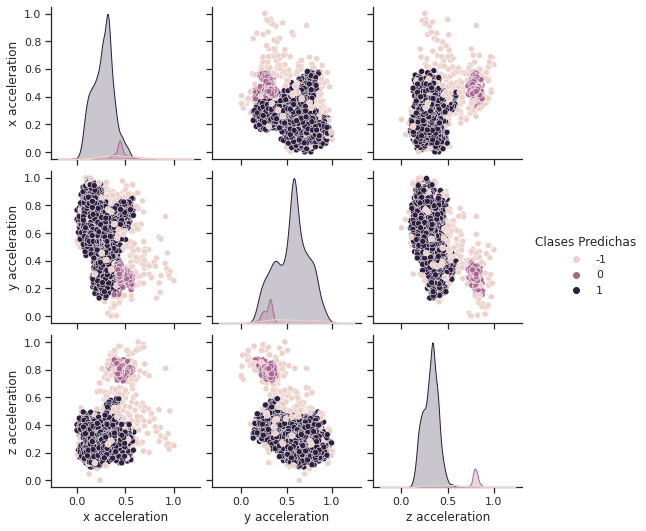

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(Datos_con_Clase_1, hue = 'Clases Predichas')
plt.show()

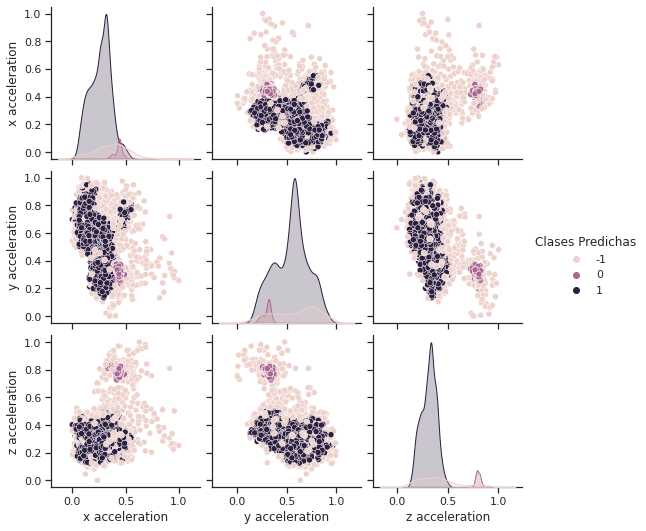

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(Datos_con_Clase_2, hue = 'Clases Predichas')
plt.show()

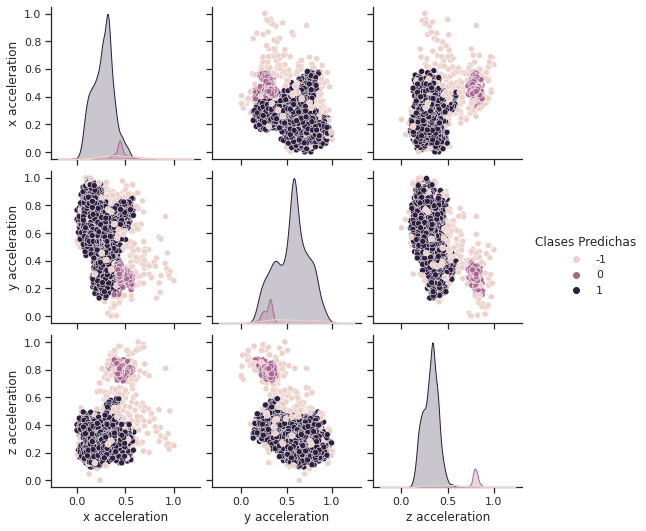

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(Datos_con_Clase_3, hue = 'Clases Predichas')
plt.show()

## Búsqueda de Hiperparámetros Aplicado en el Algoritmo DBSCAN

In [ ]:
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz
from sklearn.metrics import davies_bouldin_score # Método de validación Davies Bouldin

In [ ]:
minimas_muestras = [muestras for muestras in range(2*X_norm.shape[1],16*X_norm.shape[1])]
max_distance_clusters = [1e-3, 5e-3, 7e-3, 1e-2, 2e-2, 3e-2, 5e-2, 7e-2, 8e-2, 1e-1, 0.2, 0.3, 0.4, 0.5, 0.7, 1, 2]

In [ ]:
orden_1_Silueta, orden_1_CH, orden_1_DB  = {},{},{}
orden_2_Silueta, orden_2_CH, orden_2_DB  = {},{},{}

for m in enumerate(minimas_muestras):
  for EPS in enumerate(max_distance_clusters):
    modelo_DBSCAN_coseno = DBSCAN(eps = EPS[1], min_samples = m[1], metric = 'cosine')
    modelo_DBSCAN_euclidiana = DBSCAN(eps = EPS[1], min_samples = m[1], metric = 'euclidean')
    modelo_DBSCAN_coseno.fit(X_norm) 
    modelo_DBSCAN_euclidiana.fit(X_norm)
    Clases_coseno = modelo_DBSCAN_coseno.labels_
    Clases_euclidiana = modelo_DBSCAN_euclidiana.labels_
    
    if len(set(Clases_coseno)) > 1:
      Silueta_Coseno = silhouette_score(X_norm, Clases_coseno)
      CH_Coseno = calinski_harabasz_score(X_norm, Clases_coseno)
      DB_Coseno = davies_bouldin_score(X_norm, Clases_coseno)
      if Silueta_Coseno > 0:
        orden_1_Silueta[str(m[1]) + " - " + str(EPS[1])] = Silueta_Coseno
        print("min-sample = " + str(m[1]) + "; eps = " + str(EPS[1]), "; Valor Silueta - Coseno = ", Silueta_Coseno)
      if CH_Coseno > 0:
        orden_1_CH[str(m[1]) + " - " + str(EPS[1])] = CH_Coseno
        print("min-sample = " + str(m[1]) + "; eps = " + str(EPS[1]), "; Valor CH - Coseno = ", CH_Coseno)
      if DB_Coseno > 0:
        orden_1_DB[str(m[1]) + " - " + str(EPS[1])] = DB_Coseno
        print("min-sample = " + str(m[1]) + "; eps = " + str(EPS[1]), "; Valor DB - Coseno = ", DB_Coseno)
      
    
    if len(set(Clases_euclidiana)) > 1:
      Silueta_Euclidiana = silhouette_score(X_norm, Clases_euclidiana)
      CH_Euclidiana = calinski_harabasz_score(X_norm, Clases_euclidiana)
      DB_Euclidiana = davies_bouldin_score(X_norm, Clases_euclidiana)
      if Silueta_Euclidiana > 0:
        orden_2_Silueta[str(m[1]) + " - " + str(EPS[1])] = Silueta_Euclidiana
        print("min-sample = " + str(m[1]) + "; eps = " + str(EPS[1]), "; Valor Silueta - Euclidiana = ", Silueta_Euclidiana)
      if CH_Euclidiana > 0:
        orden_2_CH[str(m[1]) + " - " + str(EPS[1])] = CH_Euclidiana
        print("min-sample = " + str(m[1]) + "; eps = " + str(EPS[1]), "; Valor CH - Euclidiana = ", CH_Euclidiana)  
      if DB_Euclidiana > 0:
        orden_2_DB[str(m[1]) + " - " + str(EPS[1])] = DB_Euclidiana
        print("min-sample = " + str(m[1]) + "; eps = " + str(EPS[1]), "; Valor DB - Euclidiana = ", DB_Euclidiana)

mejores_parametros_coseno_silueta = max(orden_1_Silueta, key = orden_1_Silueta.get)
mejores_parametros_coseno_CH = max(orden_1_CH, key = orden_1_CH.get)
mejores_parametros_coseno_DB = min(orden_1_DB, key = orden_1_DB.get)
mejores_parametros_euclidiana_silueta = max(orden_2_Silueta, key = orden_2_Silueta.get)
mejores_parametros_euclidiana_CH = max(orden_2_CH, key = orden_2_CH.get)
mejores_parametros_euclidiana_DB = min(orden_2_DB, key = orden_2_DB.get)

print("\n")
print("Mejores Parámetros Silueta - Coseno: ", mejores_parametros_coseno_silueta)
print("Máximo valor de la Silueta - Coseno, es: ", orden_1_Silueta[mejores_parametros_coseno_silueta])
print("\n")
print("Mejores Parámetros - CH- Coseno: ", mejores_parametros_coseno_CH)
print("Máximo valor CH - Coseno, es: ", orden_1_CH[mejores_parametros_coseno_CH])
print("\n")
print("Mejores Parámetros - Coseno: ", mejores_parametros_coseno_DB)
print("Mínimo valor DB - Coseno, es: ", orden_1_DB[mejores_parametros_coseno_DB])
print("\n")
print("Mejores Parámetros Silueta - Euclidiana: ", mejores_parametros_euclidiana_silueta)
print("Máximo valor de la Silueta - Euclidiana, es: ", orden_2_Silueta[mejores_parametros_euclidiana_silueta])
print("\n")
print("Mejores Parámetros - CH- Euclidiana: ", mejores_parametros_euclidiana_CH)
print("Máximo valor CH - Euclidiana, es: ", orden_2_CH[mejores_parametros_euclidiana_CH])
print("\n")
print("Mejores Parámetros - Euclidiana: ", mejores_parametros_euclidiana_DB)
print("Mínimo valor DB - Euclidiana, es: ", orden_2_DB[mejores_parametros_euclidiana_DB])
print("\n")

min-sample = 6; eps = 0.001 ; Valor Silueta - Coseno =  0.4246696951821006
min-sample = 6; eps = 0.001 ; Valor CH - Coseno =  92.2217424240031
min-sample = 6; eps = 0.001 ; Valor DB - Coseno =  1.7308629314004196
min-sample = 6; eps = 0.005 ; Valor Silueta - Coseno =  0.4775816352394871
min-sample = 6; eps = 0.005 ; Valor CH - Coseno =  45.451306636059854
min-sample = 6; eps = 0.005 ; Valor DB - Coseno =  1.6616515015086577
min-sample = 6; eps = 0.005 ; Valor CH - Euclidiana =  1.7857941169014797
min-sample = 6; eps = 0.005 ; Valor DB - Euclidiana =  4.840290264679999
min-sample = 6; eps = 0.007 ; Valor Silueta - Coseno =  0.463641049866734
min-sample = 6; eps = 0.007 ; Valor CH - Coseno =  7.96949510527446
min-sample = 6; eps = 0.007 ; Valor DB - Coseno =  1.4181640612241884
min-sample = 6; eps = 0.007 ; Valor CH - Euclidiana =  23.562345447427724
min-sample = 6; eps = 0.007 ; Valor DB - Euclidiana =  3.33754611410619
min-sample = 6; eps = 0.01 ; Valor CH - Euclidiana =  31.8471461573

In [ ]:
Mejor_Modelo_DBSCAN_Euclidiana = DBSCAN(eps = 0.1, min_samples = 22, metric = 'euclidean')
Mejor_Modelo_DBSCAN_Coseno = DBSCAN(eps = 0.001, min_samples = 43, metric = 'cosine')
Mejor_Modelo_DBSCAN_Euclidiana.fit(X_norm)
Mejor_Modelo_DBSCAN_Coseno.fit(X_norm)
Mejor_Vector_Clases_DBSCAN_Euclidiana = Mejor_Modelo_DBSCAN_Euclidiana.labels_
Mejor_Vector_Clases_DBSCAN_Coseno = Mejor_Modelo_DBSCAN_Coseno.labels_

In [ ]:
Num_clases_menos_1_Euclidiana = list(Mejor_Vector_Clases_DBSCAN_Euclidiana).count(-1)
Num_clases_menos_1_Coseno = list(Mejor_Vector_Clases_DBSCAN_Coseno).count(-1)
print("Número de muestras etiquetas con -1, usando Distancia Euclidiana = ", Num_clases_menos_1_Euclidiana)
print("Número de muestras etiquetas con -1, usando Distancia Coseno = ", Num_clases_menos_1_Coseno)

Número de muestras etiquetas con -1, usando Distancia Euclidiana =  104
Número de muestras etiquetas con -1, usando Distancia Coseno =  343


In [ ]:
Num_Clusters_Euclidiana = len(set(Mejor_Vector_Clases_DBSCAN_Euclidiana)) - (1 if -1 in Mejor_Vector_Clases_DBSCAN_Euclidiana else 0)
Num_Clusters_Coseno = len(set(Mejor_Vector_Clases_DBSCAN_Coseno)) - (1 if -1 in Mejor_Vector_Clases_DBSCAN_Coseno else 0)
print("Número esperado de clusters - Distancia Euclidiana = ", Num_Clusters_Euclidiana)
print("Número esperado de clusters - Distancia Coseno = ", Num_Clusters_Coseno)

Número esperado de clusters - Distancia Euclidiana =  2
Número esperado de clusters - Distancia Coseno =  2


In [ ]:
pos = np.where(Mejor_Vector_Clases_DBSCAN_Euclidiana >= 0)
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_euclidiana = X_norm.loc[pos, :]
Clases_sin_outliers_euclidiana = pd.DataFrame(Mejor_Vector_Clases_DBSCAN_Euclidiana, columns = ['Clases']).loc[pos, :]

In [ ]:
pos = np.where(Mejor_Vector_Clases_DBSCAN_Coseno >= 0)
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_coseno = X_norm.loc[pos, :]
Clases_sin_outliers_coseno = pd.DataFrame(Mejor_Vector_Clases_DBSCAN_Coseno, columns = ['Clases']).loc[pos, :]

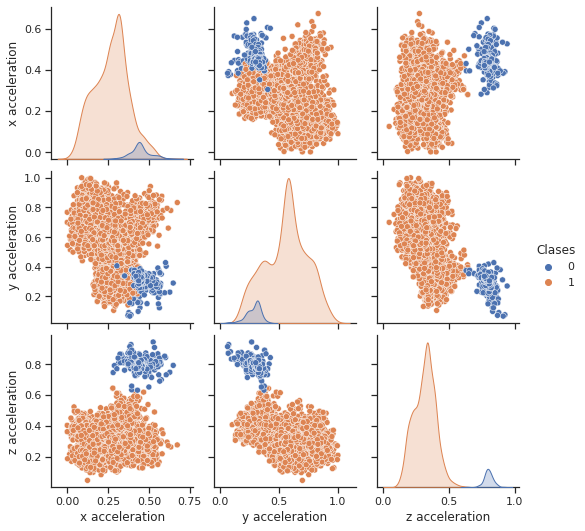

In [ ]:
data_concatenada_euclidiana = pd.concat([datos_sin_outilers_euclidiana, Clases_sin_outliers_euclidiana], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada_euclidiana, hue = 'Clases')
plt.show()

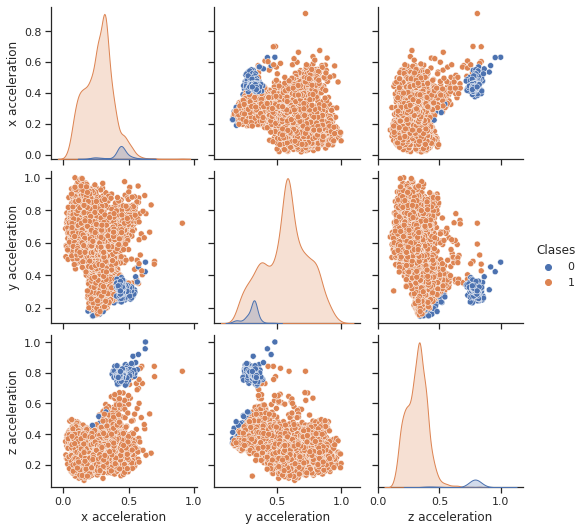

In [ ]:
data_concatenada_coseno = pd.concat([datos_sin_outilers_coseno, Clases_sin_outliers_coseno], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada_coseno, hue = 'Clases')
plt.show()

## Aplicando el algoritmo HDBSCAN

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 18.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330795 sha256=f1cf853adb2d94b2e7143176ff0b2bf4e3de5c7ff0ed39f3dc319729c0c1de32
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
from hdbscan import HDBSCAN # Algoritmo HDBSCAN

In [ ]:
Modelo_HDBSCAN_Euclidiana = HDBSCAN(min_cluster_size = 7, min_samples = 6, cluster_selection_epsilon = 0.3, metric='euclidean', alpha = 0.8)
Modelo_HDBSCAN_Manhattan = HDBSCAN(min_cluster_size = 5, min_samples = 12, cluster_selection_epsilon = 0.5, metric='manhattan', alpha = 1.0)
Modelo_HDBSCAN_Euclidiana.fit(X_norm)
Modelo_HDBSCAN_Manhattan.fit(X_norm)
Vector_Clases_HDBSCAN_Euclidiana = Modelo_HDBSCAN_Euclidiana.labels_
Vector_Clases_HDBSCAN_Manhattan = Modelo_HDBSCAN_Manhattan.labels_

In [ ]:
Num_clases_menos_1_Euclidiana = list(Vector_Clases_HDBSCAN_Euclidiana).count(-1)
Num_clases_menos_1_Manhattan = list(Vector_Clases_HDBSCAN_Manhattan).count(-1)
print("Número de muestras etiquetas con -1, usando Distancia Euclidiana = ", Num_clases_menos_1_Euclidiana)
print("Número de muestras etiquetas con -1, usando Distancia Manhattan = ", Num_clases_menos_1_Manhattan)

Número de muestras etiquetas con -1, usando Distancia Euclidiana =  61
Número de muestras etiquetas con -1, usando Distancia Manhattan =  195


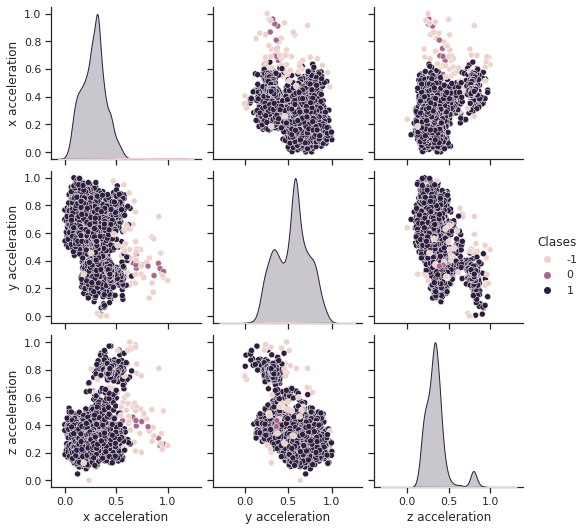

In [ ]:
data_concatenada_euclidiana = pd.concat([X_norm, pd.DataFrame(Vector_Clases_HDBSCAN_Euclidiana, columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada_euclidiana, hue = 'Clases')
plt.show()

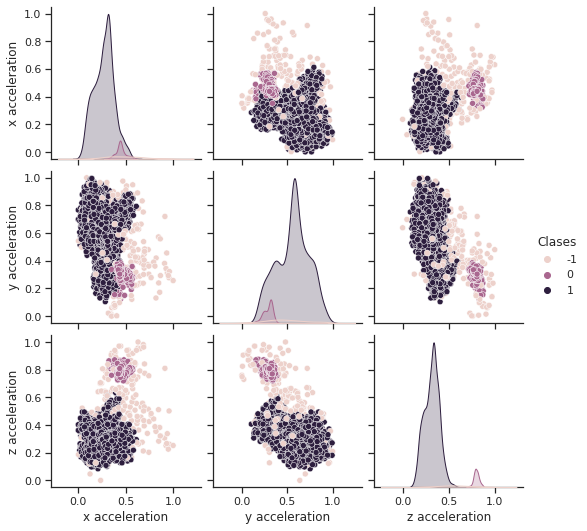

In [ ]:
data_concatenada_manhattan = pd.concat([X_norm, pd.DataFrame(Vector_Clases_HDBSCAN_Manhattan, columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada_manhattan, hue = 'Clases')
plt.show()

Número de Nodos del Árbol Jerárquico =  5199


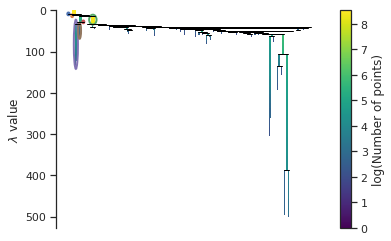

In [ ]:
Modelo_HDBSCAN_Euclidiana.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8),
                               log_size=True) # Genera una gráfica del árbol generando de forma condesada 
                                                # para facilitar su interpretación
nodos_1 = Modelo_HDBSCAN_Euclidiana.condensed_tree_.to_networkx()
print("Número de Nodos del Árbol Jerárquico = ", nodos_1.number_of_nodes())

plt.show()

Número de Nodos del Árbol Jerárquico =  5141


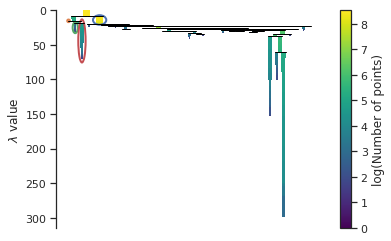

In [ ]:
Modelo_HDBSCAN_Manhattan.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8),
                               log_size=True) # Genera una gráfica del árbol generando de forma condesada 
                                                # para facilitar su interpretación
nodos_2 = Modelo_HDBSCAN_Manhattan.condensed_tree_.to_networkx()
print("Número de Nodos del Árbol Jerárquico = ", nodos_2.number_of_nodes())
plt.show()

Número de elementos o datos atípicos =  1521


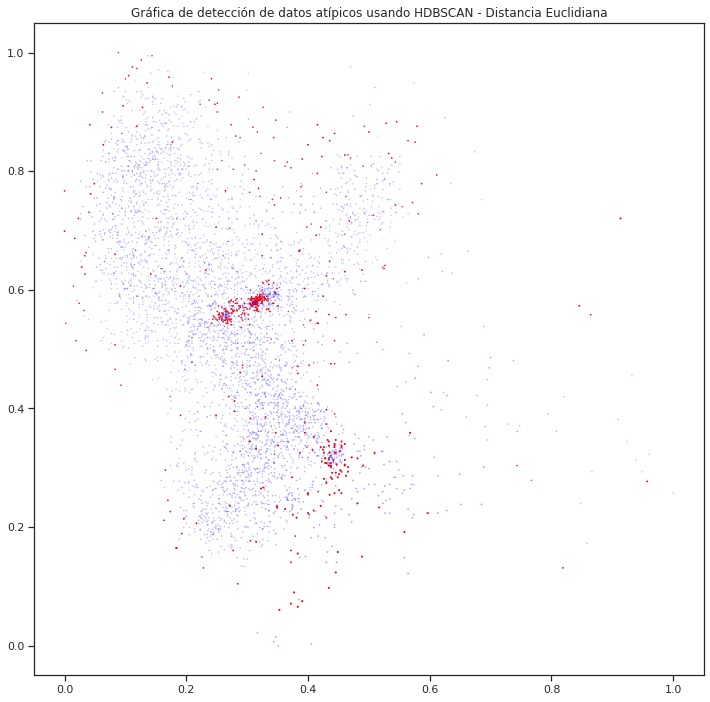

In [ ]:
X_data = X_norm.values
threshold = pd.Series(Modelo_HDBSCAN_Euclidiana.outlier_scores_).quantile(0.9)
outliers = np.where(Modelo_HDBSCAN_Euclidiana.outlier_scores_ > threshold)[0]
print("Número de elementos o datos atípicos = ", len(outliers)*X_norm.shape[1])

ax = plt.figure(figsize=(12,12))
plt.scatter(*X_data.T, c='blue', alpha=0.25)
plt.scatter(*X_data[outliers].T, c='red', alpha=1)
plt.title("Gráfica de detección de datos atípicos usando HDBSCAN - Distancia Euclidiana")
plt.show()

Número de elementos o datos atípicos =  1521


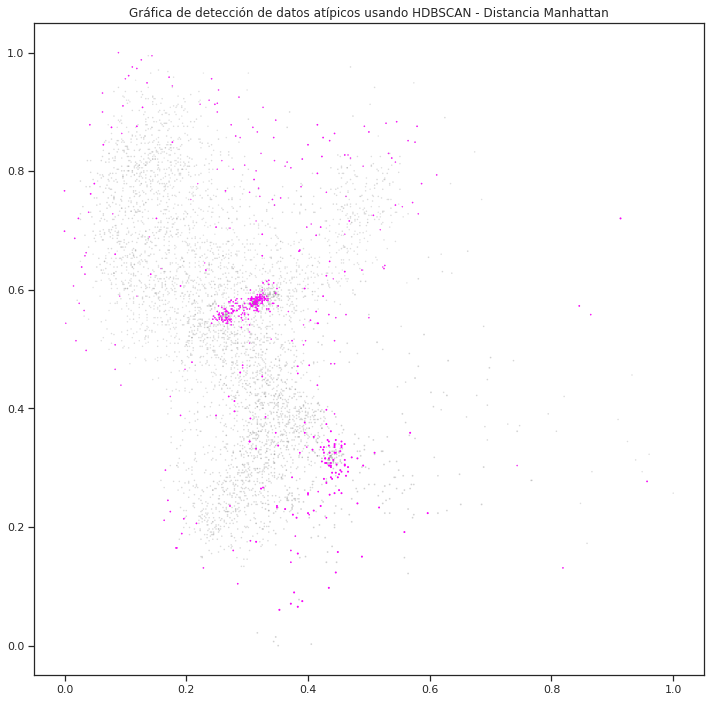

In [ ]:
X_data = X_norm.values
threshold = pd.Series(Modelo_HDBSCAN_Manhattan.outlier_scores_).quantile(0.9)
outliers_manhattan = np.where(Modelo_HDBSCAN_Manhattan.outlier_scores_ > threshold)[0]
print("Número de elementos o datos atípicos = ", len(outliers_manhattan)*X_norm.shape[1])

ax = plt.figure(figsize=(12,12))
plt.scatter(*X_data.T, c='gray', alpha=0.25)
plt.scatter(*X_data[outliers].T, c='magenta', alpha=1)
plt.title("Gráfica de detección de datos atípicos usando HDBSCAN - Distancia Manhattan")
plt.show()

## Aplicando Hiperparámetros con el Algoritmo HDBSCAN

In [ ]:
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz
from sklearn.metrics import davies_bouldin_score # Método de validación Davies Bouldin

In [ ]:
orden_1_Silueta, orden_1_CH, orden_1_DB  = {},{},{}
orden_2_Silueta, orden_2_CH, orden_2_DB  = {},{},{}

In [ ]:
minimas_tam_clusters = [muestras for muestras in range(5,10)]
max_distance_clusters = [1e-1, 0.2, 0.3, 0.4, 0.5, 0.7]
minimas_muestras = [muestras for muestras in range(2*X_norm.shape[1],4*X_norm.shape[1])]

In [ ]:
for m in enumerate(minimas_muestras):
  for e in enumerate(max_distance_clusters):
    for c in enumerate(minimas_tam_clusters):
      modelo_HDBSCAN_euclidiana = HDBSCAN(min_cluster_size = c[1], 
                                        min_samples = m[1], cluster_selection_epsilon = e[1], metric='euclidean', alpha = 1.0)
      modelo_HDBSCAN_Manhattan = HDBSCAN(min_cluster_size = c[1], 
                                       min_samples = m[1], cluster_selection_epsilon = e[1], metric='manhattan', alpha = 1.0)
      modelo_HDBSCAN_Manhattan.fit(X_norm) 
      modelo_HDBSCAN_euclidiana.fit(X_norm)
      Clases_Manhattan = modelo_HDBSCAN_Manhattan.labels_
      Clases_euclidiana = modelo_HDBSCAN_euclidiana.labels_
    
      if len(set(Clases_Manhattan)) > 1:
        Silueta_Manhattan = silhouette_score(X_norm, Clases_Manhattan)
        CH_Manhattan = calinski_harabasz_score(X_norm, Clases_Manhattan)
        DB_Manhattan = davies_bouldin_score(X_norm, Clases_Manhattan)
        if Silueta_Manhattan > 0:
          orden_1_Silueta[str(m[1]) + " - " + str(e[1]) + " - " + str(c[1])] = Silueta_Manhattan
          print("min-sample = " + str(m[1]) + "; eps = " + str(e[1]) + "; min-cluster-size = ", str(c[1]), 
                "; Valor Silueta - Manhattan = ", Silueta_Manhattan)
        if CH_Manhattan > 0:
          orden_1_CH[str(m[1]) + " - " + str(e[1]) + " - " + str(c[1])] = CH_Manhattan
          print("min-sample = " + str(m[1]) + "; eps = " + str(e[1]) + "; min-cluster-size = ", str(c[1]), 
                "; Valor CH - Manhattan = ", CH_Manhattan)
        if DB_Manhattan > 0:
          orden_1_DB[str(m[1]) + " - " + str(e[1]) + " - " + str(c[1])] = DB_Manhattan
          print("min-sample = " + str(m[1]) + "; eps = " + str(e[1]) + "; min-cluster-size = ", str(c[1]), 
                "; Valor DB - Manhattan = ", DB_Manhattan)
      
    
      if len(set(Clases_euclidiana)) > 1:
        Silueta_Euclidiana = silhouette_score(X_norm, Clases_euclidiana)
        CH_Euclidiana = calinski_harabasz_score(X_norm, Clases_euclidiana)
        DB_Euclidiana = davies_bouldin_score(X_norm, Clases_euclidiana)
        if Silueta_Euclidiana > 0:
          orden_2_Silueta[str(m[1]) + " - " + str(e[1]) + " - " + str(c[1])] = Silueta_Euclidiana
          print("min-sample = " + str(m[1]) + "; eps = " + str(e[1]) + "; min-cluster-size = ", str(c[1]), 
                "; Valor Silueta - Euclidiana = ", Silueta_Euclidiana)
        if CH_Euclidiana > 0:
          orden_2_CH[str(m[1]) + " - " + str(e[1]) + " - " + str(c[1])] = CH_Euclidiana
          print("min-sample = " + str(m[1]) + "; eps = " + str(e[1]) + "; min-cluster-size = ", str(c[1]), 
                "; Valor CH - Euclidiana = ", CH_Euclidiana)  
        if DB_Euclidiana > 0:
          orden_2_DB[str(m[1]) + " - " + str(e[1]) + " - " + str(c[1])] = DB_Euclidiana
          print("min-sample = " + str(m[1]) + "; eps = " + str(e[1]) + "; min-cluster-size = ", str(c[1]), 
                "; Valor DB - Euclidiana = ", DB_Euclidiana)

mejores_parametros_manhattan_silueta = max(orden_1_Silueta, key = orden_1_Silueta.get)
mejores_parametros_manhattan_CH = max(orden_1_CH, key = orden_1_CH.get)
mejores_parametros_manhattan_DB = min(orden_1_DB, key = orden_1_DB.get)
mejores_parametros_euclidiana_silueta = max(orden_2_Silueta, key = orden_2_Silueta.get)
mejores_parametros_euclidiana_CH = max(orden_2_CH, key = orden_2_CH.get)
mejores_parametros_euclidiana_DB = min(orden_2_DB, key = orden_2_DB.get)

print("\n")
print("Mejores Parámetros Silueta - manhattan: ", mejores_parametros_manhattan_silueta)
print("Máximo valor de la Silueta - manhattan, es: ", orden_1_Silueta[mejores_parametros_manhattan_silueta])
print("\n")
print("Mejores Parámetros - CH- manhattan: ", mejores_parametros_manhattan_CH)
print("Máximo valor CH - manhattan, es: ", orden_1_CH[mejores_parametros_manhattan_CH])
print("\n")
print("Mejores Parámetros - manhattan: ", mejores_parametros_manhattan_DB)
print("Mínimo valor DB - manhattan, es: ", orden_1_DB[mejores_parametros_manhattan_DB])
print("\n")
print("Mejores Parámetros Silueta - Euclidiana: ", mejores_parametros_euclidiana_silueta)
print("Máximo valor de la Silueta - Euclidiana, es: ", orden_2_Silueta[mejores_parametros_euclidiana_silueta])
print("\n")
print("Mejores Parámetros - CH- Euclidiana: ", mejores_parametros_euclidiana_CH)
print("Máximo valor CH - Euclidiana, es: ", orden_2_CH[mejores_parametros_euclidiana_CH])
print("\n")
print("Mejores Parámetros - Euclidiana: ", mejores_parametros_euclidiana_DB)
print("Mínimo valor DB - Euclidiana, es: ", orden_2_DB[mejores_parametros_euclidiana_DB])
print("\n")

min-sample = 6; eps = 0.1; min-cluster-size =  5 ; Valor Silueta - Manhattan =  0.2715378468018787
min-sample = 6; eps = 0.1; min-cluster-size =  5 ; Valor CH - Manhattan =  466.36528798515633
min-sample = 6; eps = 0.1; min-cluster-size =  5 ; Valor DB - Manhattan =  2.4258652309627853
min-sample = 6; eps = 0.1; min-cluster-size =  5 ; Valor Silueta - Euclidiana =  0.4019258004107434
min-sample = 6; eps = 0.1; min-cluster-size =  5 ; Valor CH - Euclidiana =  103.56348691830732
min-sample = 6; eps = 0.1; min-cluster-size =  5 ; Valor DB - Euclidiana =  1.8836630663413425
min-sample = 6; eps = 0.1; min-cluster-size =  6 ; Valor Silueta - Manhattan =  0.2715378468018787
min-sample = 6; eps = 0.1; min-cluster-size =  6 ; Valor CH - Manhattan =  466.36528798515633
min-sample = 6; eps = 0.1; min-cluster-size =  6 ; Valor DB - Manhattan =  2.4258652309627853
min-sample = 6; eps = 0.1; min-cluster-size =  6 ; Valor Silueta - Euclidiana =  0.4019258004107434
min-sample = 6; eps = 0.1; min-clust

In [ ]:
Mejor_Modelo_HDBSCAN = HDBSCAN(min_cluster_size = 6,
                              min_samples = 11, cluster_selection_epsilon = 0.1, metric = 'euclidean', alpha = 1.0)
Mejor_Modelo_HDBSCAN.fit(X_norm)
Clases_Seleccionadas = Mejor_Modelo_HDBSCAN.labels_
Num_clases_menos_1_Euclidiana = list(Clases_Seleccionadas).count(-1)
print("Número de muestras etiquetas con -1, usando Distancia Euclidiana = ", Num_clases_menos_1_Euclidiana)

Número de muestras etiquetas con -1, usando Distancia Euclidiana =  152


Número de Nodos del Árbol Jerárquico =  5127


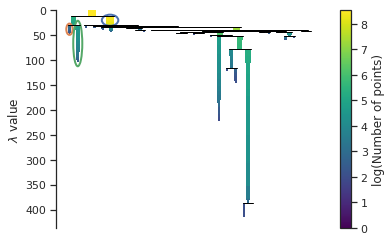

In [ ]:
Mejor_Modelo_HDBSCAN.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8),
                               log_size=True) # Genera una gráfica del árbol generando de forma condesada 
                                                # para facilitar su interpretación
nodos = Mejor_Modelo_HDBSCAN.condensed_tree_.to_networkx()
print("Número de Nodos del Árbol Jerárquico = ", nodos.number_of_nodes())
plt.show()

In [ ]:
pos = np.where(Clases_Seleccionadas >= 0)
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_euclidiana = X_norm.loc[pos, :]
Clases_sin_outliers_euclidiana = pd.DataFrame(Clases_Seleccionadas, columns = ['Clases']).loc[pos, :]

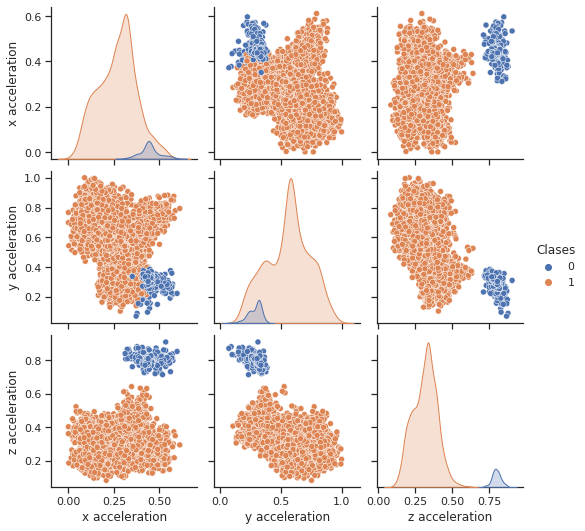

In [ ]:
data_concatenada_euclidiana = pd.concat([datos_sin_outilers_euclidiana, Clases_sin_outliers_euclidiana], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada_euclidiana, hue = 'Clases')
plt.show()